In [3]:
# Import required libraries
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from scipy.io import loadmat
import requests
import os
import matplotlib.pyplot as plt

In [4]:
# Function to download SVHN dataset
def download_svhn(url, filename):
    if not os.path.exists(filename):
        print(f"Downloading {filename}...")
        response = requests.get(url)
        with open(filename, 'wb') as f:
            f.write(response.content)
    else:
        print(f"{filename} already downloaded.")

# URLs for train and test data
train_url = 'http://ufldl.stanford.edu/housenumbers/train_32x32.mat'
test_url = 'http://ufldl.stanford.edu/housenumbers/test_32x32.mat'

# Download the datasets
download_svhn(train_url, 'train_32x32.mat')
download_svhn(test_url, 'test_32x32.mat')

# Load the datasets
train_data = loadmat('train_32x32.mat')
test_data = loadmat('test_32x32.mat')

# Extract images and labels
X_train, y_train = train_data['X'], train_data['y'].flatten()
X_test, y_test = test_data['X'], test_data['y'].flatten()

# Reshape to match Keras' expected input shape (num_samples, height, width, channels)
X_train = np.transpose(X_train, (3, 0, 1, 2))
X_test = np.transpose(X_test, (3, 0, 1, 2))

# Convert labels to categorical format
y_train = to_categorical(y_train % 10, 10)  # SVHN labels the digit 0 as 10, so we take mod 10
y_test = to_categorical(y_test % 10, 10)

# Normalize the data
X_train = X_train / 255.0
X_test = X_test / 255.0

print(f"Training data shape: {X_train.shape}, Testing data shape: {X_test.shape}")

Training data shape: (73257, 32, 32, 3), Testing data shape: (26032, 32, 32, 3)


In [5]:
# Build the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 4, 4, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 2, 2, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 160,202 (625.79 KB)

 Trainable params: 160,202 (625.79 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/20
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 130s 112ms/step - accuracy: 0.4335 - loss: 1.6438 - val_accuracy: 0.8469 - val_loss: 0.5420
Epoch 2/20
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 120s 105ms/step - accuracy: 0.8208 - loss: 0.6064 - val_accuracy: 0.8750 - val_loss: 0.4402
Epoch 3/20
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 138s 101ms/step - accuracy: 0.8583 - loss: 0.4820 - val_accuracy: 0.8868 - val_loss: 0.3997
Epoch 4/20
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 142s 101ms/step - accuracy: 0.8751 - loss: 0.4290 - val_accuracy: 0.8962 - val_loss: 0.3798
Epoch 5/20
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 140s 100ms/step - accuracy: 0.8865 - loss: 0.3914 - val_accuracy: 0.8980 - val_loss: 0.3603
Epoch 6/20
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 143s 100ms/step - accuracy: 0.8950 - loss: 0.3564 - val_accuracy: 0.9053 - val_loss: 0.3379
Epoch 7/20
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 141s 100ms/step - accuracy: 0.9011 - loss: 0.3333 - val_accuracy: 0.8976 - val_loss: 0.3578
Epoch 8/20
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 144s 101ms/step - ac

In [7]:
# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc}")

814/814 - 12s - 14ms/step - accuracy: 0.9122 - loss: 0.3506
Test accuracy: 0.91218501329422


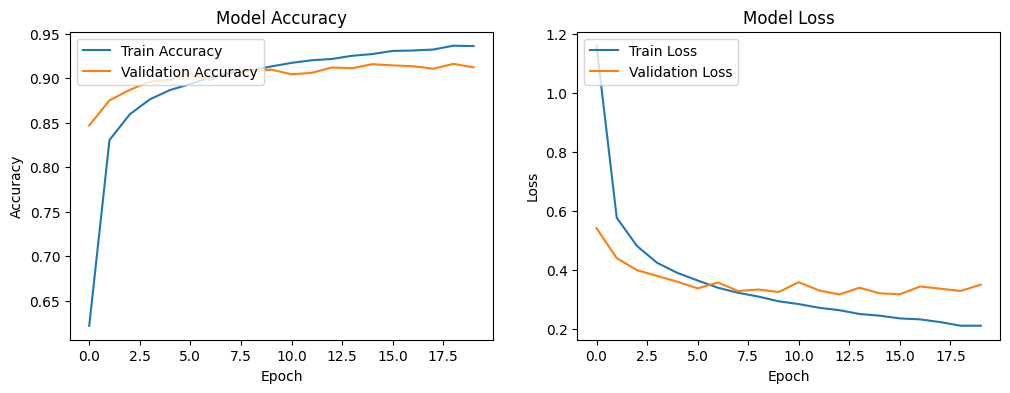

In [8]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper left')

plt.show()

814/814 ━━━━━━━━━━━━━━━━━━━━ 13s 16ms/step


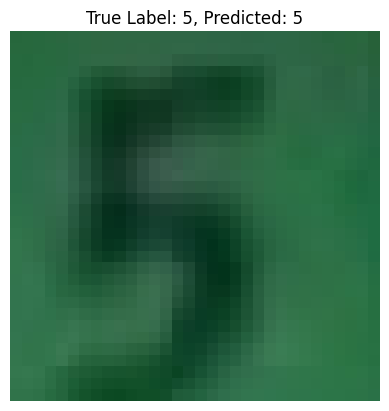

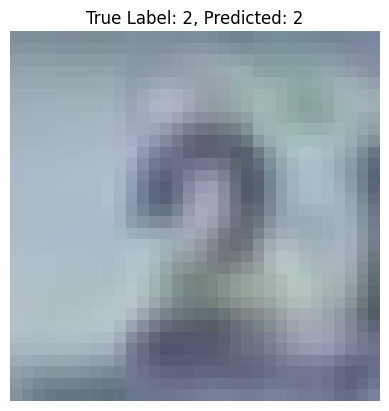

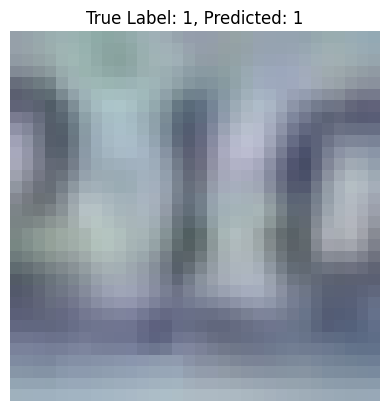

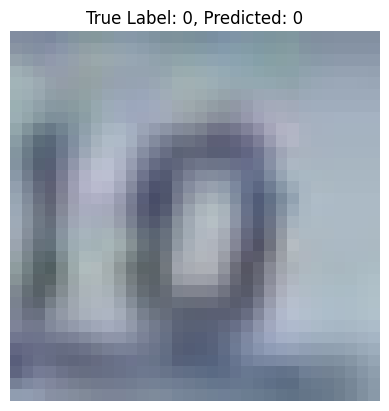

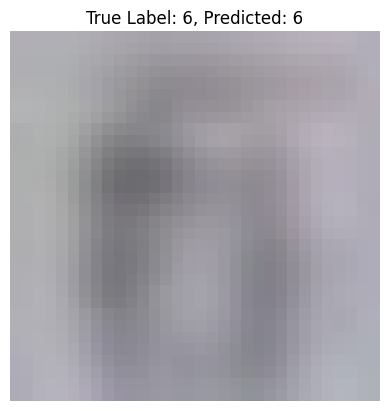

In [9]:
# Make predictions
predictions = model.predict(X_test)

# Display some test images with their predicted and true labels
for i in range(5):
    plt.imshow(X_test[i])
    plt.title(f"True Label: {np.argmax(y_test[i])}, Predicted: {np.argmax(predictions[i])}")
    plt.axis('off')
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


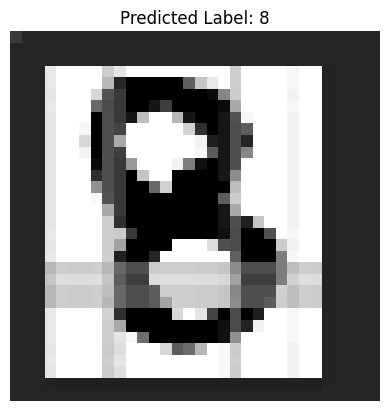

In [12]:
from PIL import Image

def preprocess_image(image_path):
    # Load the image
    img = Image.open(image_path).resize((32, 32))
    # Ensure the image is in RGB format (3 channels)
    img = img.convert('RGB')
    # Convert to numpy array and scale pixel values
    img_array = np.array(img) / 255.0  # Normalize
    # Reshape to (1, 32, 32, 3) for prediction
    img_array = img_array.reshape((1, 32, 32, 3))
    return img_array

def predict_and_display(image_path):
    # Preprocess the image
    img_array = preprocess_image(image_path)

    # Make a prediction
    prediction = model.predict(img_array)
    predicted_label = np.argmax(prediction[0])

    # Display the image and the prediction
    plt.imshow(img_array[0])
    plt.title(f"Predicted Label: {predicted_label}")
    plt.axis('off')
    plt.show()

# Use the path of the uploaded image
image_path = '/content/images.png'  # Replace with your image file name
predict_and_display(image_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


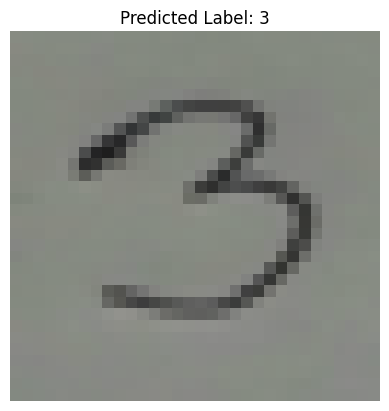

In [13]:
def preprocess_image(image_path):
    # Load the image
    img = Image.open(image_path).resize((32, 32))
    # Ensure the image is in RGB format (3 channels)
    img = img.convert('RGB')
    # Convert to numpy array and scale pixel values
    img_array = np.array(img) / 255.0  # Normalize
    # Reshape to (1, 32, 32, 3) for prediction
    img_array = img_array.reshape((1, 32, 32, 3))
    return img_array

def predict_and_display(image_path):
    # Preprocess the image
    img_array = preprocess_image(image_path)

    # Make a prediction
    prediction = model.predict(img_array)
    predicted_label = np.argmax(prediction[0])

    # Display the image and the prediction
    plt.imshow(img_array[0])
    plt.title(f"Predicted Label: {predicted_label}")
    plt.axis('off')
    plt.show()

# Use the path of the uploaded image
image_path = '/content/image2.jpg'  # Replace with your image file name
predict_and_display(image_path)